<a href="https://colab.research.google.com/github/ABDELLAH070707/-prevision-des-ventes/blob/main/Copie_de_Assignment_1_Variables_Assignment%2C_Math_Ops%2C_Precedence%2C_and_Print_Get.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyFTS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
!pip install dill

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 2.4 MB/s eta 0:00:00


In [ ]:
# library import
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_log_error
from pyFTS.models import song
from pyFTS.partitioners import Grid
from pyFTS.common import Transformations

# Lecture des ensembles de données pour analyse

In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
holiday_events=pd.read_csv("holidays_events.csv")
oil=pd.read_csv("oil.csv")
stores=pd.read_csv("stores.csv")
transactions=pd.read_csv("transactions.csv")

# Vérification des informations

In [ ]:
display("Train",train.head(4),train.tail(4), train.shape, "*"*50)
display("Test",test.head(4),test.tail(4), test.shape, "*"*50)
display("Holiday Events",holiday_events.head(4),holiday_events.tail(4), holiday_events.shape, "*"*50)
display("Oil",oil.head(4),oil.tail(4), oil.shape, "*"*66)
display("Stores",stores.head(4),stores.tail(4), stores.shape, "*"*50)
display("Transactions",transactions.head(4),transactions.tail(4), transactions.shape, "*"*50)

'Train'

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0


,id,date,store_nbr,family,sales,onpromotion
822897,822897,2014-04-08,48.0,DELI,451.657,0.0
822898,822898,2014-04-08,48.0,EGGS,96.000,0.0
822899,822899,2014-04-08,48.0,FROZEN FOODS,106.000,0.0
822900,822900,NaN,NaN,NaN,NaN,NaN


(822901, 6)

'**************************************************'

'Test'

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20


,id,date,store_nbr,family,onpromotion
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9
28511,3029399,2017-08-31,9,SEAFOOD,0


(28512, 5)

'**************************************************'

'Holiday Events'

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False


,date,type,locale,locale_name,description,transferred
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


(350, 6)

'**************************************************'

'Oil'

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12


,date,dcoilwtico
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96
1217,2017-08-31,47.26


(1218, 2)

'******************************************************************'

'Stores'

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9


,store_nbr,city,state,type,cluster
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11
52,53,Manta,Manabi,D,13
53,54,El Carmen,Manabi,C,3


(54, 5)

'**************************************************'

'Transactions'

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487


,date,store_nbr,transactions
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


(83488, 3)

'**************************************************'

# Modifier les informations

In [ ]:
train["date"] = pd.to_datetime(train.date)
test["date"] = pd.to_datetime(test.date)
holiday_events["date"] = pd.to_datetime(holiday_events.date)
oil["date"] = pd.to_datetime(oil.date)
transactions["date"] = pd.to_datetime(transactions.date)

In [ ]:
holiday_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


# Méthodes

In [ ]:
def plot_series(time, series, format="-", start=0, end=None, label=None, x_label=None, y_label=None):
    fig, ax = plt.subplots(figsize=(14,5))
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(label)
    plt.grid(True)
    plt.show()
    plt.close()

def plot_bar(x_value,y_value,label=None, x_label=None, y_label=None):
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.bar(x_value,y_value, color='blue')
    ax.set_title(label)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.xticks(rotation=90)
    plt.show()
    plt.close()

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(10)
    model_scores = {}

    for name, model in models.items():
        print("Fitting " + name)
        model.fit(X_train, y_train)

        print("Scoring " + name)
        y_pred = model.predict(X_test)
        y_pred = [0 if x < 0 else x for x in y_pred]

        # calcular RMSLE para cada modelo
        model_scores[name] = np.sqrt(mean_squared_log_error(y_true=y_test,
                                                    y_pred=y_pred))
        print(model_scores[name])

    return model_scores

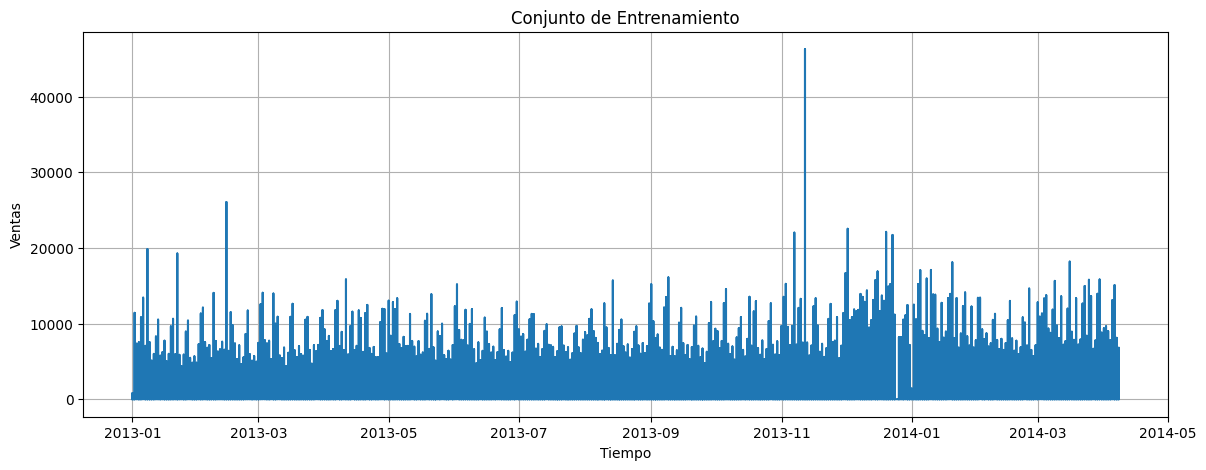

In [ ]:
plot_series(train["date"], train["sales"], format="-", start=0, end=None, label="Conjunto de Entrenamiento",x_label="Tiempo",y_label="Ventas")

# Gráfico de precios de Petroleo

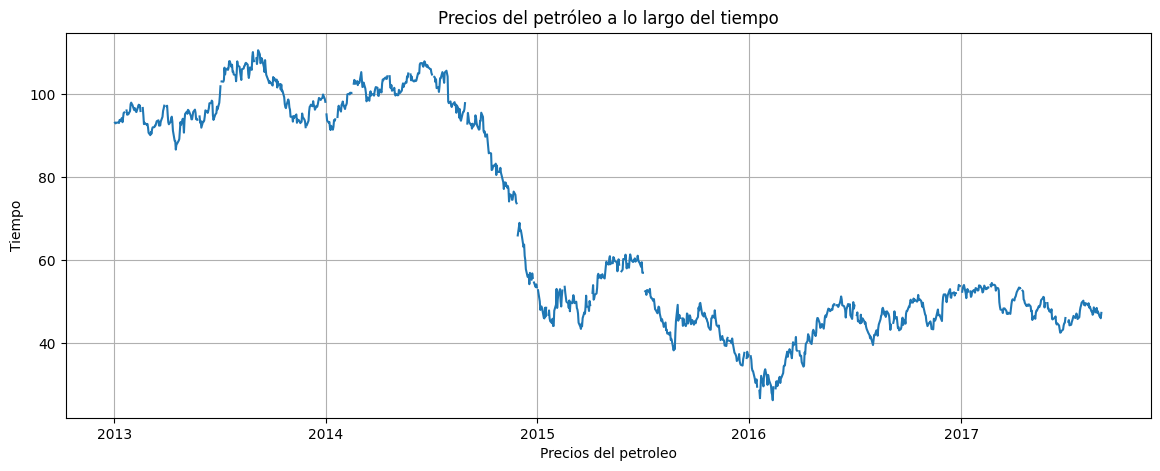

In [ ]:
plot_series(oil['date'], oil['dcoilwtico'],
            format="-", start=0,
            end=None, label="Precios del petróleo a lo largo del tiempo",
            x_label="Precios del petroleo",
            y_label="Tiempo")

# Corrélation entre le pétrole et les ventes

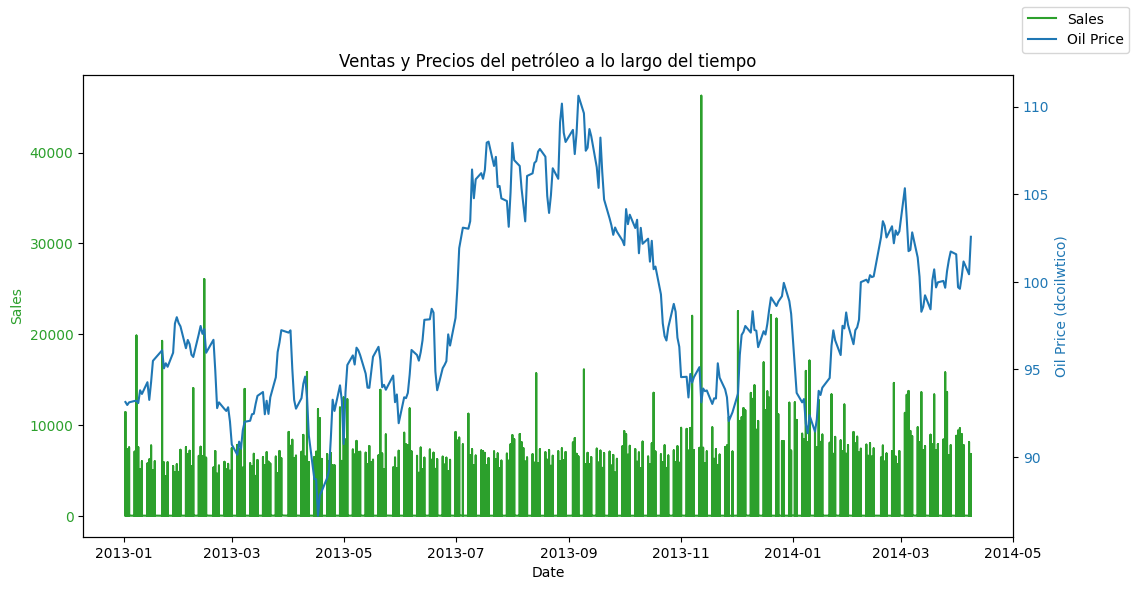

In [ ]:
merged_df = pd.merge(train, oil, on='date', how='left')

oil_sales = merged_df.groupby('date')['sales'].sum().reset_index()

# drop missing data
merged_df.dropna(subset=['sales', 'dcoilwtico'], inplace=True)

fig, ax1 = plt.subplots(figsize=(12, 6))

# plot for sales
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales', color='tab:green')
sales_line, = ax1.plot(merged_df['date'], merged_df['sales'], color='tab:green', label='Sales')
ax1.tick_params(axis='y', labelcolor='tab:green')

# plot for oil price
ax2 = ax1.twinx()
ax2.set_ylabel('Oil Price (dcoilwtico)', color='tab:blue')
oil_line, = ax2.plot(merged_df['date'], merged_df['dcoilwtico'], color='tab:blue', label='Oil Price')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Ventas y Precios del petróleo a lo largo del tiempo')
fig.legend(handles=[sales_line, oil_line], loc='upper right')
plt.show()

# Corrélation entre promotion et ventes

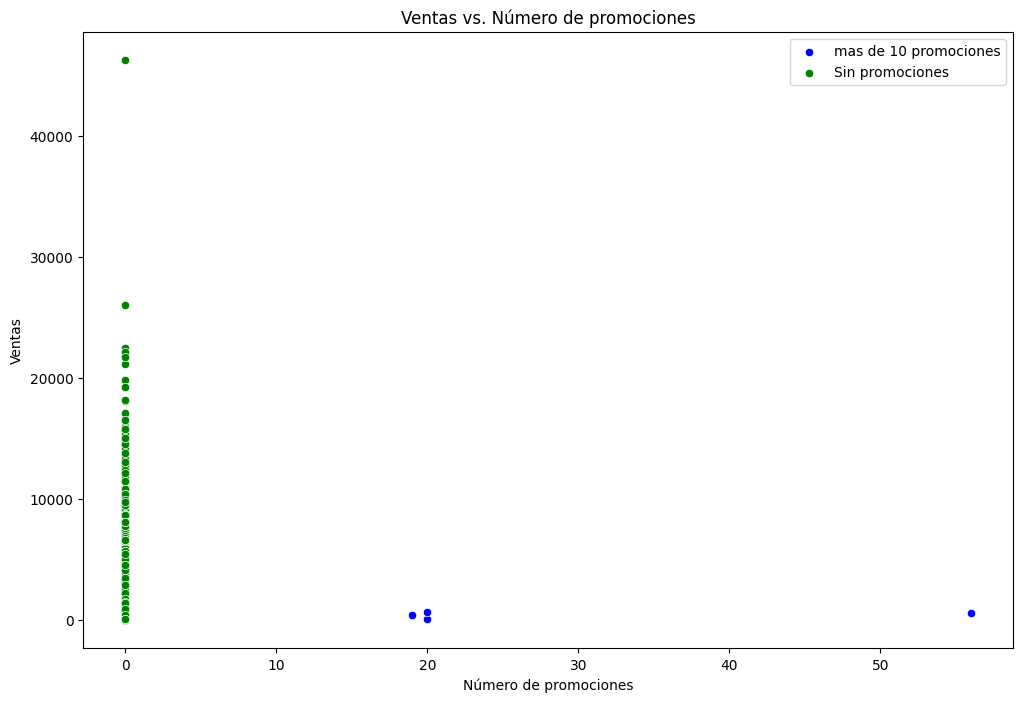

In [ ]:
plt.figure(figsize=(12, 8))
# El número de 'onpromotion' es mayor que 10
sns.scatterplot(x='onpromotion', y='sales', data=train[train['onpromotion'] == 10], color='red', label='10 promociones')
# El número de 'onpromotion' es menor que 10
sns.scatterplot(x='onpromotion', y='sales', data=train[train['onpromotion'] > 10], color='blue', label='mas de 10 promociones')
# El número de 'onpromotion' es 0
sns.scatterplot(x='onpromotion', y='sales', data=train[train['onpromotion'] == 0], color='green', label='Sin promociones')
plt.title('Ventas vs. Número de promociones')
plt.xlabel('Número de promociones')
plt.ylabel('Ventas')
plt.legend()
plt.show()

# Corrélation entre vacances et soldes

In [ ]:
holiday_events['date'] = pd.to_datetime(holiday_events['date'])
train['date'] = pd.to_datetime(train['date'])

holiday_types = ['Holiday', 'Additional', 'Bridge', 'Work Day', 'Transfer', 'Event']
for holiday_type in holiday_types:
    holiday_events[holiday_type] = (holiday_events['type'] == holiday_type).astype(int)

train_df = pd.merge(train, holiday_events[['date'] + holiday_types], on='date', how='left')
train_df[holiday_types] = train_df[holiday_types].fillna(0).astype(int)

train_df.head()

,id,date,store_nbr,family,sales,onpromotion,Holiday,Additional,Bridge,Work Day,Transfer,Event
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,1,0,0,0,0,0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0,1,0,0,0,0,0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0,1,0,0,0,0,0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0,1,0,0,0,0,0
4,4,2013-01-01,1.0,BOOKS,0.0,0.0,1,0,0,0,0,0


# Matrice de corrélation

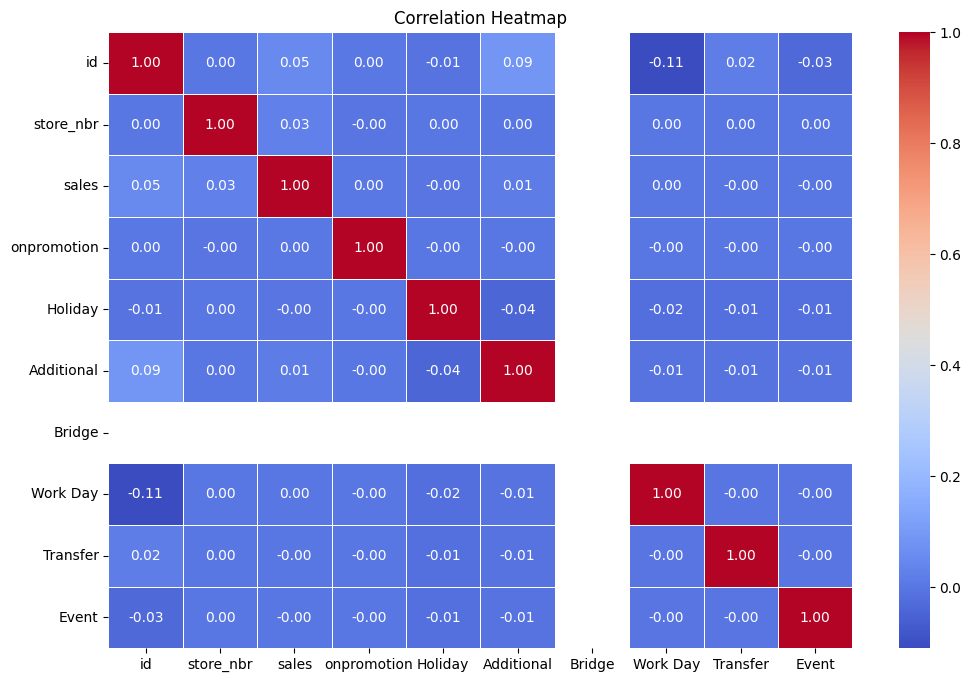

In [ ]:
# Calcular la matriz de correlación
train_df_to_corr = train_df.drop(["family","date"],axis=1)
correlation_matrix = train_df_to_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

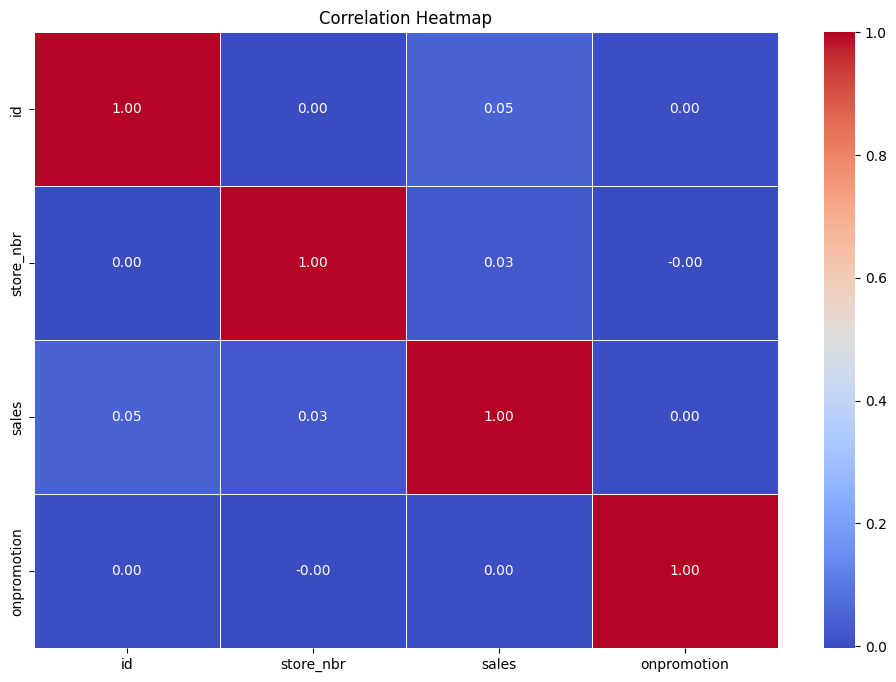

In [ ]:
# Calcular la matriz de correlación
train_to_corr = train.drop(["family","date"],axis=1)
correlation_matrix = train_to_corr.corr()

# Crear un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Influence des vacances sur les ventes

In [ ]:
train_df

,id,date,store_nbr,family,sales,onpromotion,Holiday,Additional,Bridge,Work Day,Transfer,Event
0,0,2013-01-01,1.0,AUTOMOTIVE,0.000,0.0,1,0,0,0,0,0
1,1,2013-01-01,1.0,BABY CARE,0.000,0.0,1,0,0,0,0,0
2,2,2013-01-01,1.0,BEAUTY,0.000,0.0,1,0,0,0,0,0
3,3,2013-01-01,1.0,BEVERAGES,0.000,0.0,1,0,0,0,0,0
4,4,2013-01-01,1.0,BOOKS,0.000,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
831806,822896,2014-04-08,48.0,DAIRY,953.000,0.0,0,0,0,0,0,0
831807,822897,2014-04-08,48.0,DELI,451.657,0.0,0,0,0,0,0,0
831808,822898,2014-04-08,48.0,EGGS,96.000,0.0,0,0,0,0,0,0
831809,822899,2014-04-08,48.0,FROZEN FOODS,106.000,0.0,0,0,0,0,0,0


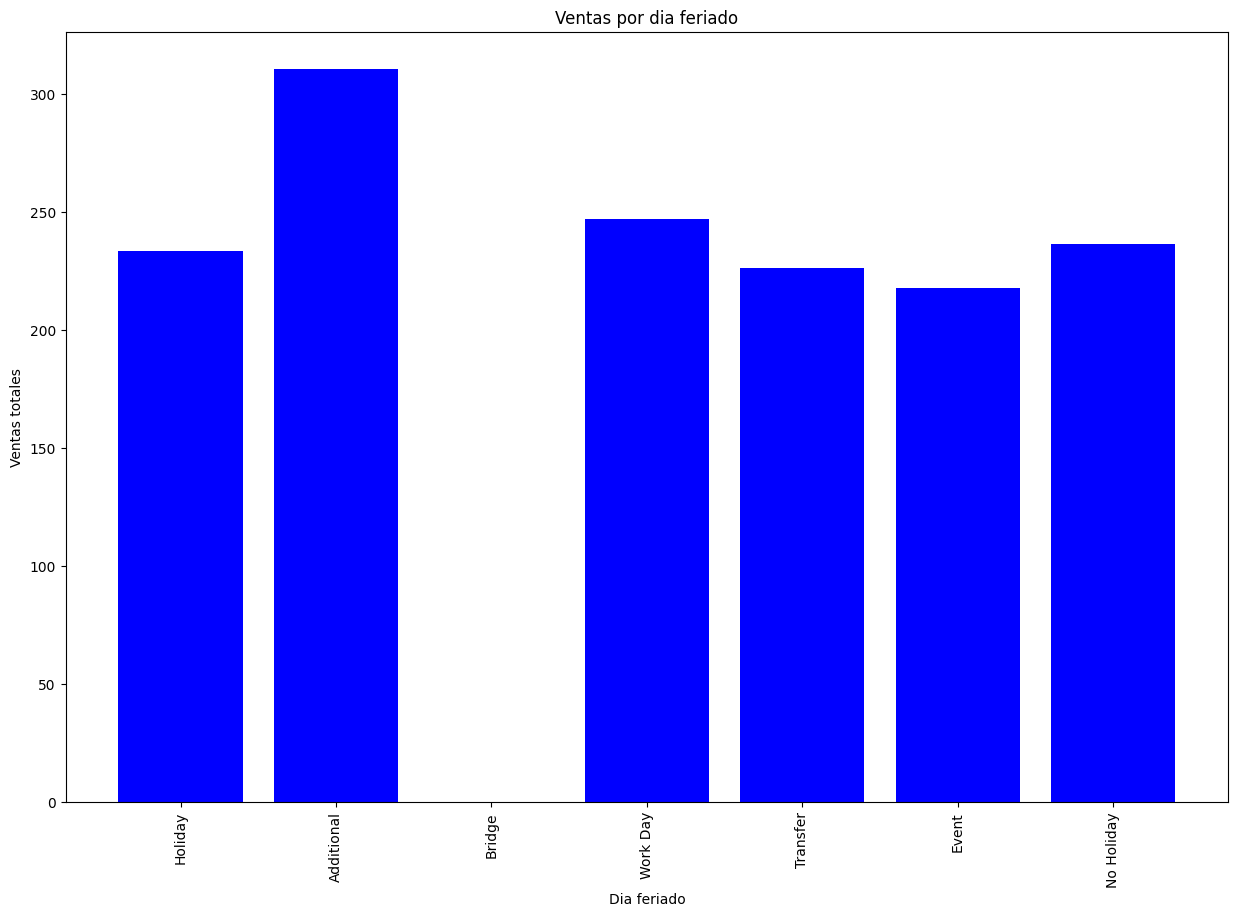

In [ ]:
holiday_sales_means = {} #almacenar las medias de ventas para cada tipo de día festivo y para días no festivos

for holiday_type in holiday_types:
    filtered_rows = train_df[train_df[holiday_type] == 1.0]
    holiday_sales_means[holiday_type] = filtered_rows['sales'].mean()

no_holiday_data = train_df[(train_df[holiday_types].sum(axis=1) == 0)]
holiday_sales_means['No Holiday'] = no_holiday_data['sales'].mean()

plot_bar(holiday_sales_means.keys(),holiday_sales_means.values(),"Ventas por dia feriado","Dia feriado","Ventas totales")

# Ventes totales pour chaque catégorie

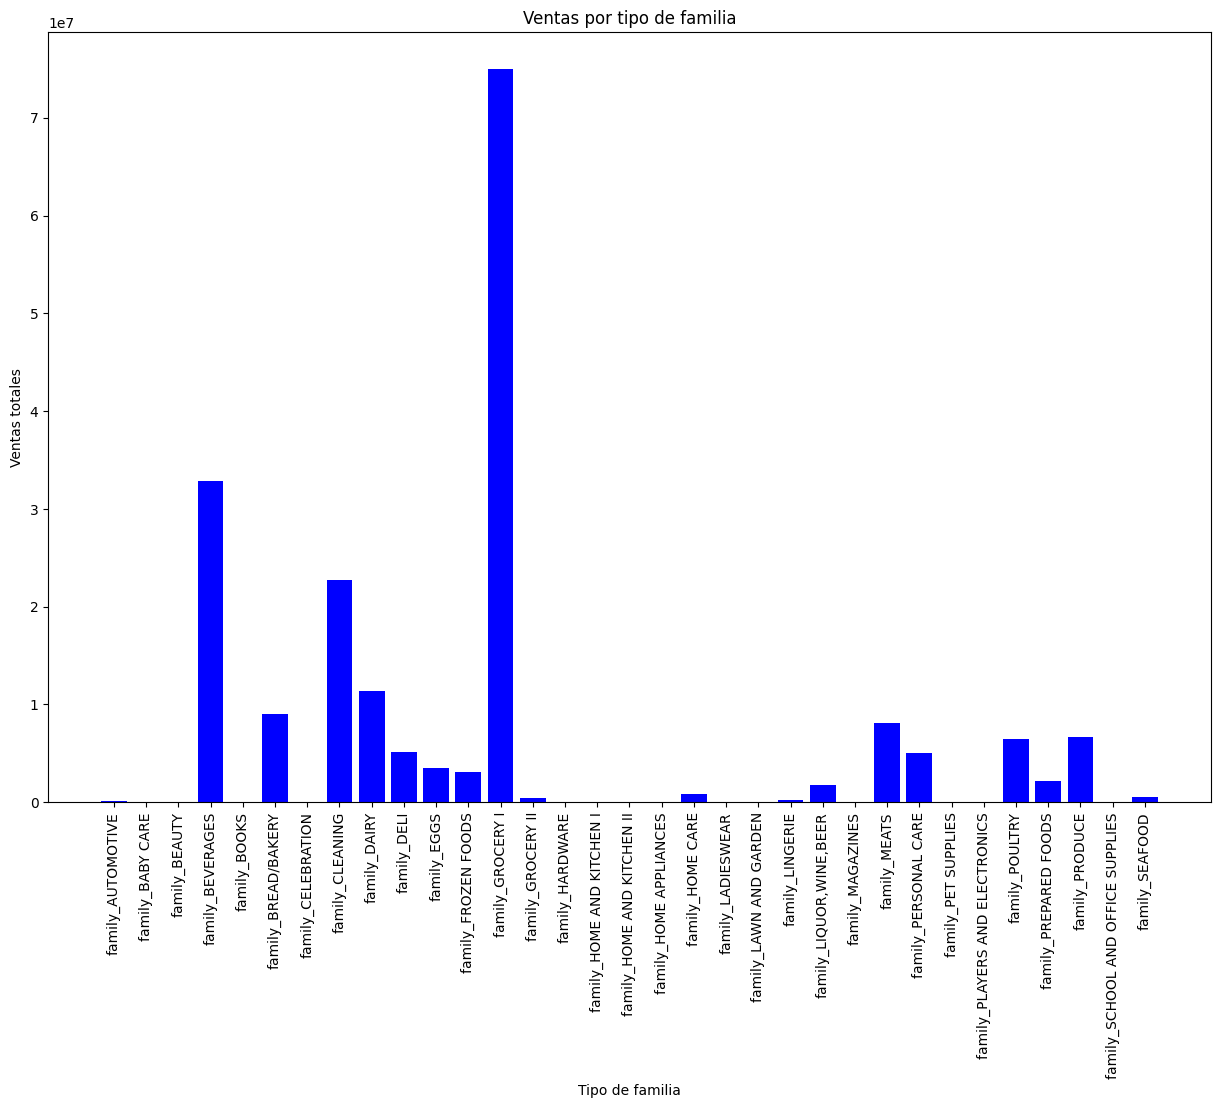

In [ ]:
train_df = pd.get_dummies(train, columns=['family'])

family_types = [col for col in train_df.columns if col.startswith('family_')]
family_sales_sum = {}

for family_type in family_types:
    filtered_rows = train_df[train_df[family_type] == 1.0]
    family_sales_sum[family_type] = filtered_rows['sales'].sum()

plot_bar(family_sales_sum.keys(),family_sales_sum.values(),"Ventas por tipo de familia","Tipo de familia","Ventas totales")

# Jour de la semaine avec les ventes les plus élevées

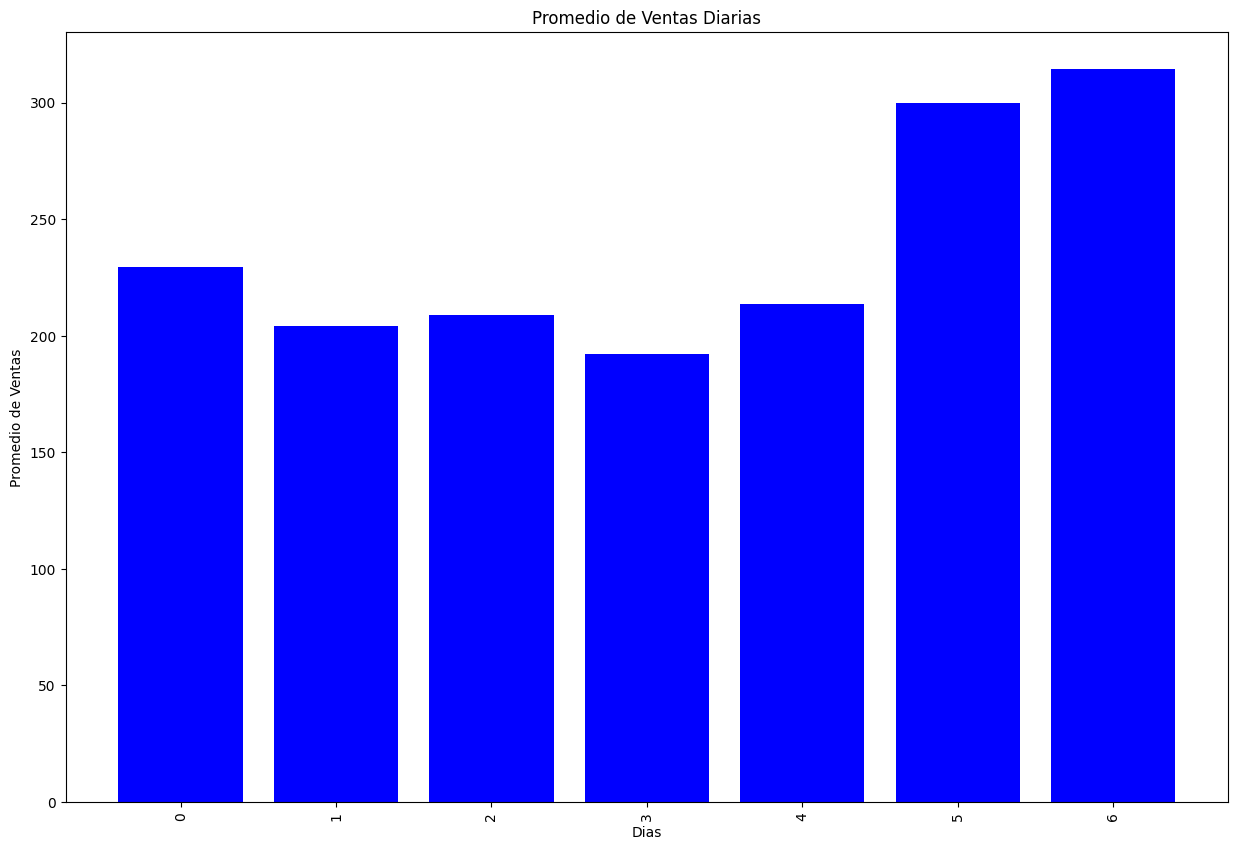

In [ ]:
train_df['date'] = pd.to_datetime(train_df['date'])

train_df['day_of_week'] = train_df['date'].dt.dayofweek

train_df[['id', 'date', 'day_of_week']]

day_avg_sales = train_df.groupby('day_of_week')['sales'].mean().reset_index()

plot_bar(day_avg_sales['day_of_week'],day_avg_sales['sales'],"Promedio de Ventas Diarias","Dias","Promedio de Ventas")

Impact du mois sur les ventes

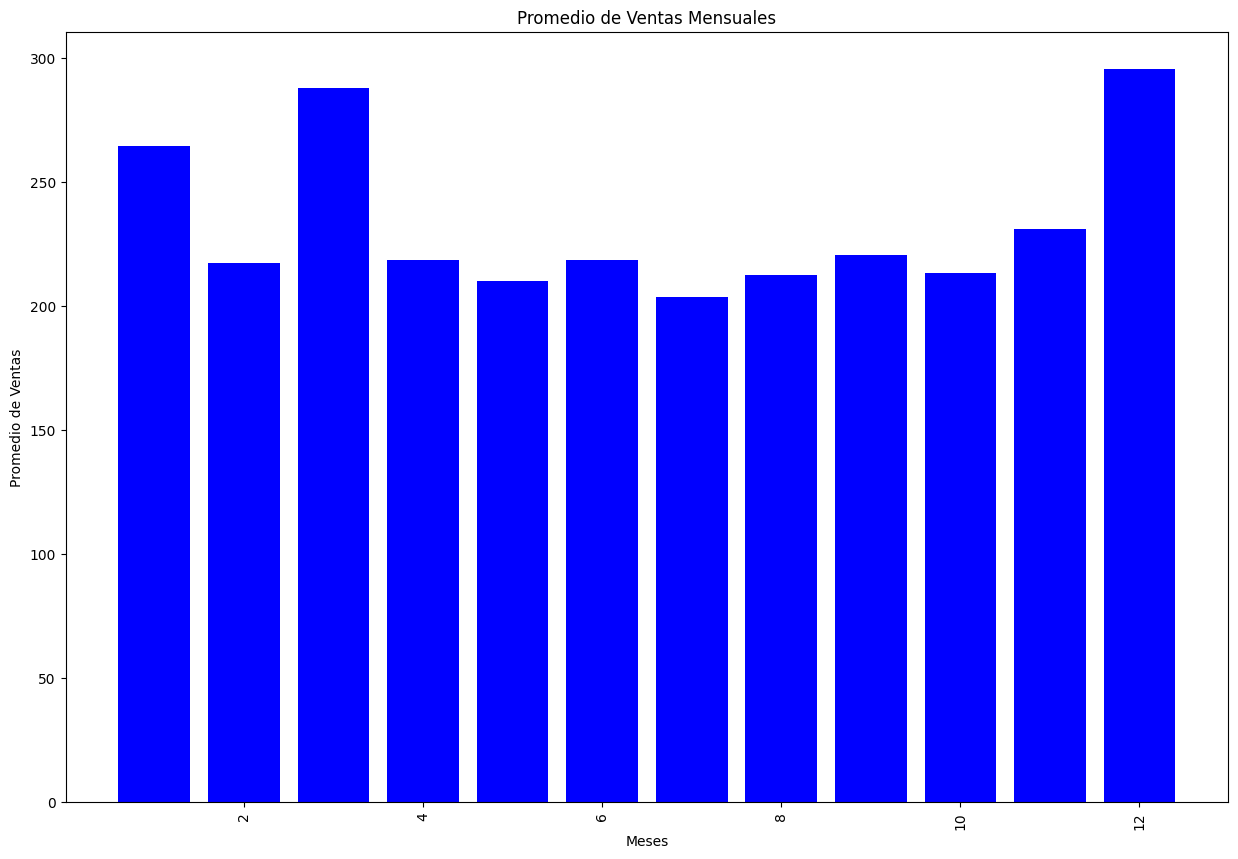

In [ ]:
#Creamos una nueva columna month

train_df['month'] = train_df['date'].dt.month
month_avg_sales = train_df.groupby('month')['sales'].mean().reset_index()

plot_bar(month_avg_sales['month'],month_avg_sales['sales'],"Promedio de Ventas Mensuales","Meses","Promedio de Ventas")

# Mois avec les ventes les plus élevées

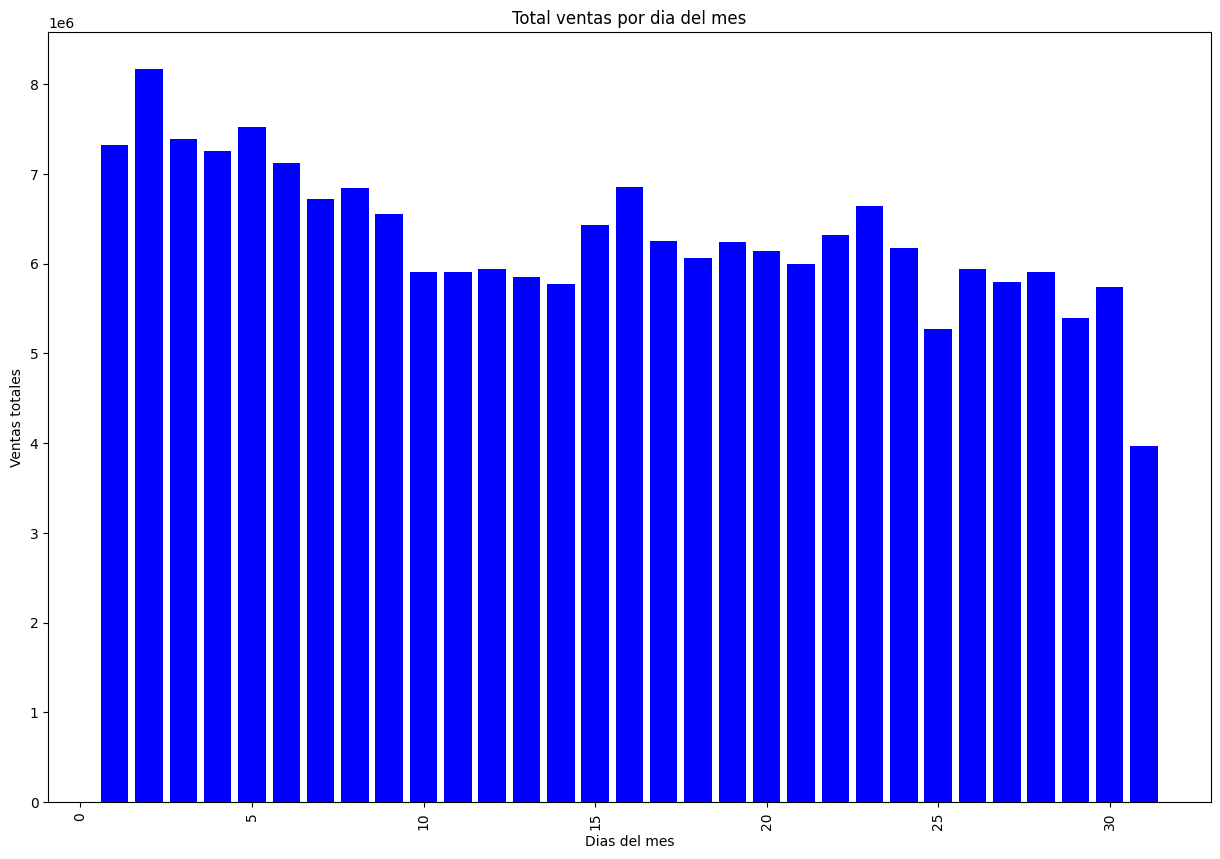

In [ ]:
train_df['day_of_month'] = train_df['date'].dt.day
day_of_month_sales_sum = train_df.groupby('day_of_month')['sales'].sum().reset_index()

plot_bar(day_of_month_sales_sum['day_of_month'],day_of_month_sales_sum['sales'],"Total ventas por dia del mes","Dias del mes","Ventas totales")


# Influence de l'emplacement des magasins sur les ventes

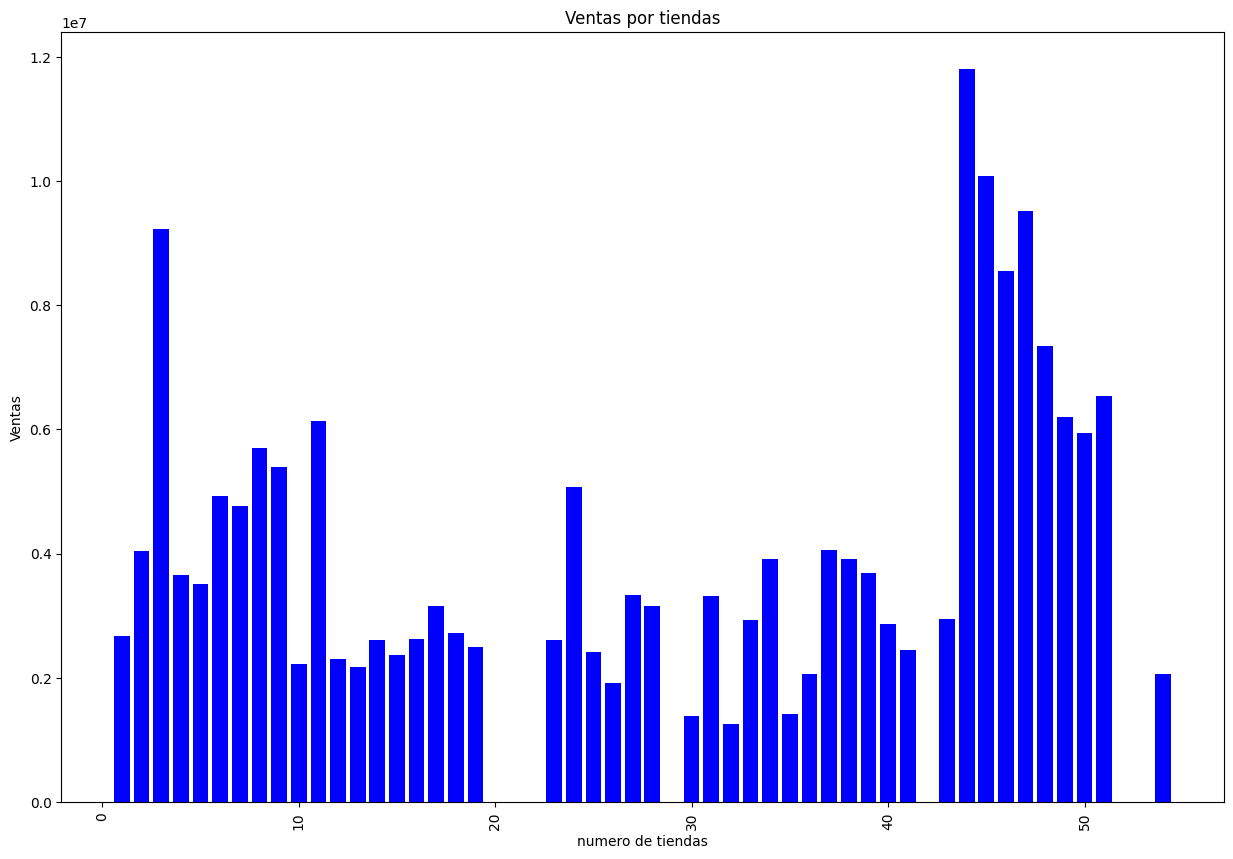

In [ ]:
store_sales_sum = train_df.groupby('store_nbr')['sales'].sum().reset_index()


plot_bar(store_sales_sum['store_nbr'],store_sales_sum['sales'],"Ventas por tiendas","numero de tiendas","Ventas")

# Type de magasin le plus influent sur les ventes

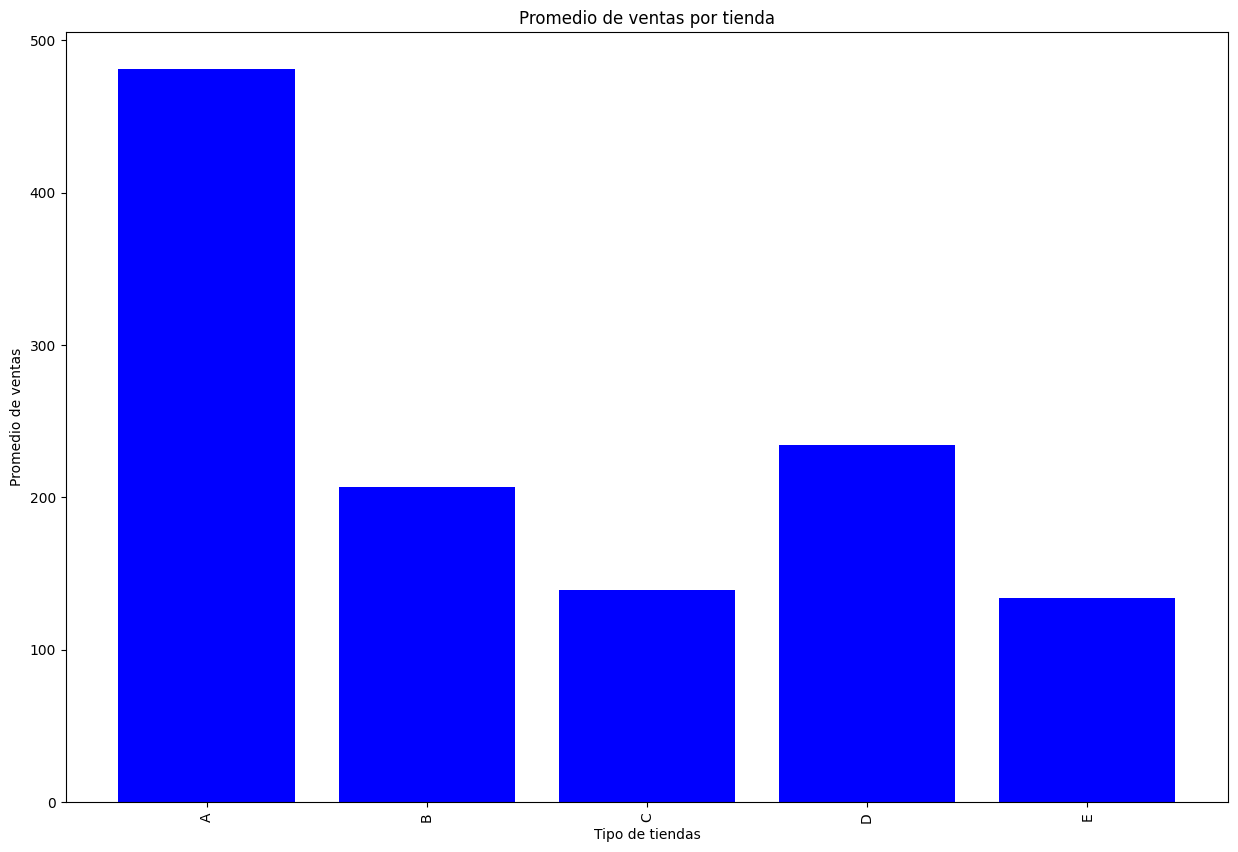

In [ ]:
merged_df = pd.merge(train, stores, on='store_nbr', how='left')
type_avg_sales = merged_df.groupby('type')['sales'].mean().reset_index()

plot_bar(type_avg_sales['type'],type_avg_sales['sales'],"Promedio de ventas por tienda","Tipo de tiendas","Promedio de ventas")

# Ville la plus influente en termes de ventes

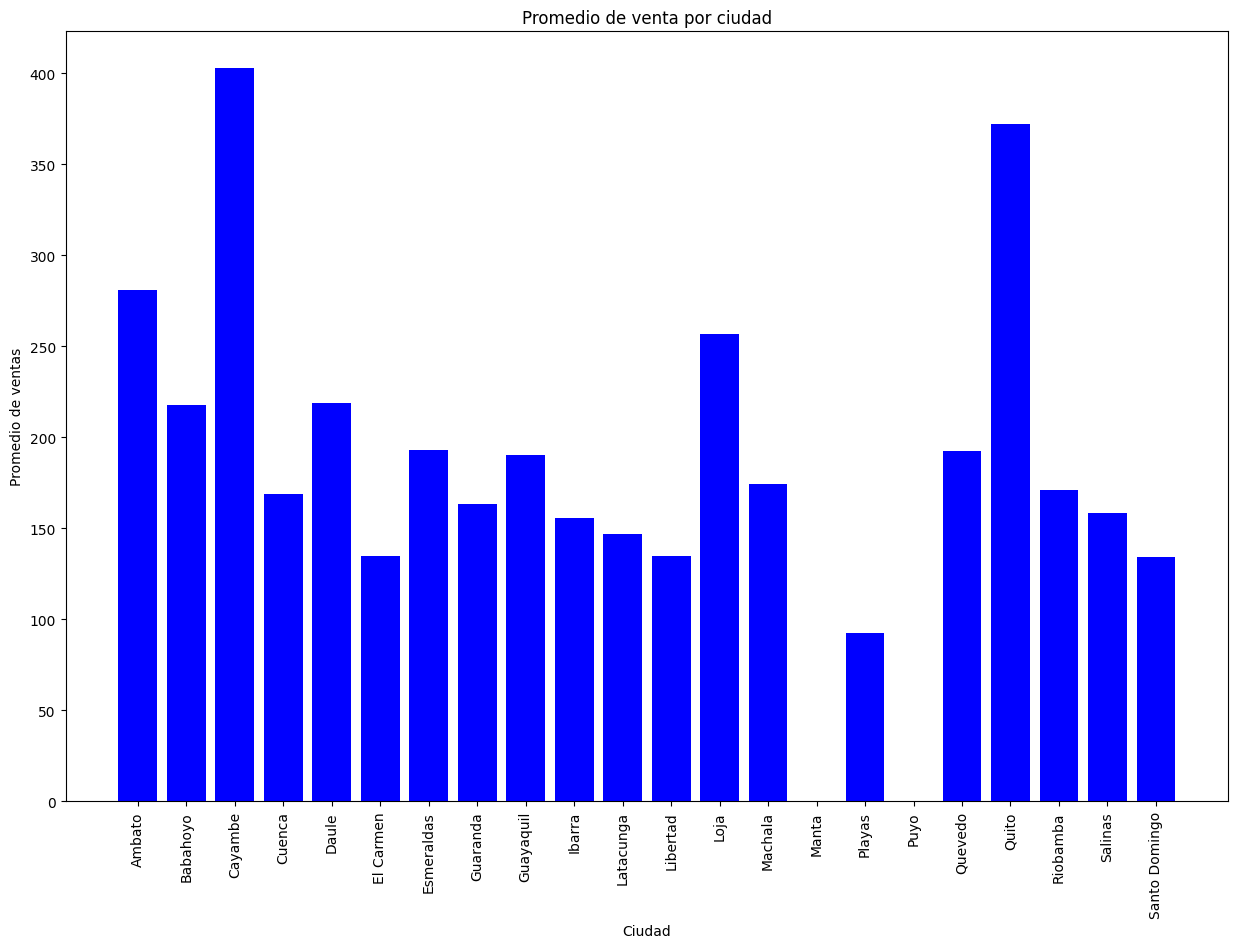

In [ ]:
city_avg_sales = merged_df.groupby('city')['sales'].mean().reset_index()


plot_bar(city_avg_sales['city'],city_avg_sales['sales'],"Promedio de venta por ciudad","Ciudad","Promedio de ventas")

:# Sélection et formation du modèle

In [ ]:
train.isna().sum()

id             0
date           1
store_nbr      1
family         1
sales          1
onpromotion    1
dtype: int64

In [ ]:
def join_dfs(train, oil, holiday_events, stores):
    merged = pd.merge(train, oil, on='date')
    merged = pd.merge(merged, holiday_events, on='date', how='left')
    merged = merged.fillna("None")
    merged = pd.merge(merged, stores, on='store_nbr', how='left')

    return merged

In [ ]:
df_train = join_dfs(train, oil, holiday_events, stores)
df_train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dcoilwtico     0
type_x         0
locale         0
locale_name    0
description    0
transferred    0
Holiday        0
Additional     0
Bridge         0
Work Day       0
Transfer       0
Event          0
city           0
state          0
type_y         0
cluster        0
dtype: int64

In [ ]:
#Dividir en dia mes y año el DF
def datetime_split(df):
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df.drop('date', axis=1, inplace=True)

In [ ]:
holiday_events["date"] = pd.to_datetime(holiday_events.date)
datetime_split(holiday_events)
oil["date"] = pd.to_datetime(oil.date)
datetime_split(oil)
transactions["date"] = pd.to_datetime(transactions.date)
datetime_split(transactions)
test["date"] = pd.to_datetime(test.date)
datetime_split(test)

In [ ]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,locale,locale_name,...,Holiday,Additional,Bridge,Work Day,Transfer,Event,city,state,type_y,cluster
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,None,Holiday,National,Ecuador,...,1.0,0.0,0.0,0.0,0.0,0.0,Quito,Pichincha,D,13
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0,None,Holiday,National,Ecuador,...,1.0,0.0,0.0,0.0,0.0,0.0,Quito,Pichincha,D,13
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0,None,Holiday,National,Ecuador,...,1.0,0.0,0.0,0.0,0.0,0.0,Quito,Pichincha,D,13
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0,None,Holiday,National,Ecuador,...,1.0,0.0,0.0,0.0,0.0,0.0,Quito,Pichincha,D,13
4,4,2013-01-01,1.0,BOOKS,0.0,0.0,None,Holiday,National,Ecuador,...,1.0,0.0,0.0,0.0,0.0,0.0,Quito,Pichincha,D,13


In [ ]:
# grabbing the non-numeric columns
df_train['date'] = pd.to_datetime(df_train['date']).astype(int) // 10**9
df_train['dcoilwtico'] = pd.to_numeric(df_train['dcoilwtico'], errors='coerce')
non_numeric_columns = df_train.select_dtypes(exclude='number').columns
print(non_numeric_columns)
# using one_hot_encoder with pd.get_dummies for continuous values
df_train_continuous = pd.get_dummies(df_train, columns=non_numeric_columns)
df_train_continuous.replace(np.nan, 0, inplace=True)
df_train_continuous.dtypes

Index(['family', 'type_x', 'locale', 'locale_name', 'description',
       'transferred', 'Holiday', 'Additional', 'Bridge', 'Work Day',
       'Transfer', 'Event', 'city', 'state', 'type_y'],
      dtype='object')


id               int64
date             int64
store_nbr      float64
sales          float64
onpromotion    float64
                ...   
type_y_A         uint8
type_y_B         uint8
type_y_C         uint8
type_y_D         uint8
type_y_E         uint8
Length: 158, dtype: object

In [ ]:
df_train_continuous

,id,date,store_nbr,sales,onpromotion,dcoilwtico,cluster,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,...,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_y_A,type_y_B,type_y_C,type_y_D,type_y_E
0,0,1356998400,1.0,0.000,0.0,0.00,13,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,1356998400,1.0,0.000,0.0,0.00,13,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,2,1356998400,1.0,0.000,0.0,0.00,13,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,3,1356998400,1.0,0.000,0.0,0.00,13,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,4,1356998400,1.0,0.000,0.0,0.00,13,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593017,822895,1396915200,48.0,1413.000,0.0,102.57,14,0,0,0,...,0,1,0,0,0,1,0,0,0,0
593018,822896,1396915200,48.0,953.000,0.0,102.57,14,0,0,0,...,0,1,0,0,0,1,0,0,0,0
593019,822897,1396915200,48.0,451.657,0.0,102.57,14,0,0,0,...,0,1,0,0,0,1,0,0,0,0
593020,822898,1396915200,48.0,96.000,0.0,102.57,14,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
X = df_train_continuous.drop('sales', axis=1)
X.drop('id', axis=1, inplace=True)
y = df_train['sales']

np.random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [ ]:
models = {"XGBRegressor": xgb.XGBRegressor(),
          "LinearRegression": LinearRegression(),
          "BaggingRegressor": BaggingRegressor(),
          "RandomForestRegressor": RandomForestRegressor(n_jobs=-1)}

In [ ]:
%%time
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

Fitting XGBRegressor
Scoring XGBRegressor
1.685259723912528
Fitting LinearRegression
Scoring LinearRegression
2.4828313848409125
Fitting BaggingRegressor
Scoring BaggingRegressor
0.4506558527185684
Fitting RandomForestRegressor
Scoring RandomForestRegressor
0.448904515375369
CPU times: user 33min 54s, sys: 11.4 s, total: 34min 5s
Wall time: 20min 56s


In [ ]:
model_scores

{'XGBRegressor': 1.685259723912528,
 'LinearRegression': 2.4828313848409125,
 'BaggingRegressor': 0.4506558527185684,
 'RandomForestRegressor': 0.448904515375369}

# Comparaison des résultats

In [ ]:
model_scores_df = pd.DataFrame(list(model_scores.items()), columns=['Model', 'Sales'])
model_scores_df['ID'] = range(1, len(model_scores_df) + 1)
model_scores_df.set_index('ID', inplace=True)
model_scores_df.drop(columns=['Model'], inplace=True)
model_scores_df

,Sales
ID,
1,1.685260
2,2.482831
3,0.450656
4,0.448905


In [ ]:
model_scores_df.to_csv('submission.csv', index=False)